In [15]:
import pandas as pd
import numpy as np
import nltk


#df = pd.read_excel(r"C:\Users\Maximilian.Rasch\Desktop\Projekt 2\MS Bestelleinheiten.xlsx", sheet_name="Data")


df = pd.read_excel(r"C:\Users\Max\Desktop\Github Projects\Multinominal-Classification-Artikelgruppen\X Bestelleinheiten.xlsx", sheet_name="Data")

df2 = df[["Artikel", "Artikelgruppe"]]

print(df2.head(5))

                                             Artikel        Artikelgruppe
0         Aufschnitt 6-fach sortiert 1/2 Stück 1,3kg  Wurst Spezialitäten
1  Aufschnitt sortiert geschnitten gefächert Atmo...  Wurst Spezialitäten
2    Back Hinterschinken geschnitten in Schale 0,5kg             Schinken
3            Backhinterschinken rund 1/2 Stück 1,9kg             Schinken
4                            Bacon geschnitten 0,5kg                Speck


In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Max\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
def condition2(x, labels):
    controll = {}
    labels = labels
    controll[(labels[0])] = 1
    for i in range(1, len(labels)+1):
        for e in labels:
            if e not in controll:
                controll.update({e: list(controll.values())[-1]+1})
    return controll[x]

l = l =(df2["Artikelgruppe"].unique()).tolist()

df2["Labels as num"] = df2["Artikelgruppe"].apply(condition2,labels=l)

print(df2.head(5))

                                             Artikel        Artikelgruppe  \
0         Aufschnitt 6-fach sortiert 1/2 Stück 1,3kg  Wurst Spezialitäten   
1  Aufschnitt sortiert geschnitten gefächert Atmo...  Wurst Spezialitäten   
2    Back Hinterschinken geschnitten in Schale 0,5kg             Schinken   
3            Backhinterschinken rund 1/2 Stück 1,9kg             Schinken   
4                            Bacon geschnitten 0,5kg                Speck   

   Labels as num  
0              1  
1              1  
2              2  
3              2  
4              3  


C:\Users\Max\AppData\Local\Temp/ipykernel_4140/2325688676.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Labels as num"] = df2["Artikelgruppe"].apply(condition2,labels=l)


In [32]:
import re
from nltk.corpus import stopwords

german_stop_words = stopwords.words('german')



customstomwords = []


def stopwordpress(word):
    splitted = word.split(" ")
    clear = []
    for e in splitted:
        if(re.search(r'[0-9]+', e)):
            clear.append(e)
        elif len(e) == 1:
            clear.append(e)
        elif(re.match('^Aroma', e)):
            clear.append(e)
        elif(re.match('^gegart', e)):
            clear.append(e)
        elif(re.match('^grob', e)):
            clear.append(e)
        elif(re.match('^klein', e)):
            clear.append(e)
        elif(re.match('^befüllt', e)):
            clear.append(e)
        elif(re.match('^geschnitten', e)):
            clear.append(e)
        elif(re.match('^gegart', e)):
            clear.append(e)
        elif(re.match('^fein', e)):
            clear.append(e)           
        elif e == "":
            pass
    return clear

for e in df2["Artikel"]:
    customstomwords.append(stopwordpress(e))

stopwordsfinal = [item for sublist in customstomwords for item in sublist]

for e in german_stop_words:
    stopwordsfinal.append(e)


In [33]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(stop_words=stopwordsfinal)
x_train_count = v.fit_transform(df2["Artikel"])

x_train, x_test, y_train, y_test = train_test_split(df["Artikel"], df2["Labels as num"], train_size=0.7, test_size=0.3, random_state=42)

x = []
ytest = []
ytrain = []

from sklearn.naive_bayes import MultinomialNB
for i in range (0,50):
    model = MultinomialNB(alpha=i)
    model.fit(x_train_count, df2["Labels as num"])
    x.append(i)
    ytest.append(model.score(v.transform(x_train),y_train))
    ytrain.append(model.score(v.transform(x_test),y_test ))

C:\Users\Max\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['1a', '4kg', '6kg', '70', '7kg', '8kg', '9kg', 'fach'] not in stop_words.
  warnings.warn(
C:\Users\Max\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


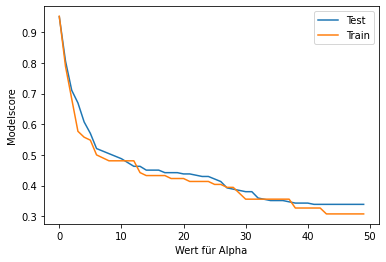

In [34]:
import matplotlib.pyplot as plt

plt.plot(x, ytest, label="Test")
plt.plot(x, ytrain, label = "Train")
plt.xlabel("Wert für Alpha")
plt.ylabel("Modelscore")
plt.legend()

plt.show()

#-> Sweet Spot ca bei alpha "5"

In [35]:
# Problem: Aktuelle Scores
#0.7059724349157733
#0.6646341463414634
#Aktuell werden auch Grammangaben als Wörter verarbeitet, aber die Grammangabe bezieht sich nicht auf die Artikelgruppe
#Lösung, Alle Zahlen bzw Grammangaben als Stopwords rausnehmen

In [36]:
for i in range(1,19): 
    print(i)
    print(df2[df2["Labels as num"] == i]["Artikelgruppe"].unique()[0])



1
Wurst Spezialitäten
2
Schinken
3
Speck
4
Salami, Hartwurst
5
Brühwurst (Bockwurst, Wiener, Debrecziner, Knacker...)
6
Bratwurst
7
Streichwurst (Leberwurst, Blutwurst, Mettwurst,...)
8
Schweinefleisch
9
Rindfleisch
10
Hackfleischprodukte
11
Fleischsalat, Wurstsalat, Ochsenmaulsalat,
12
Hähnchenfleisch
13
Kalbfleisch
14
Kalbsinnereien
15
Käse am Stück / geschnitten in Kilo
16
Geflügelwurst
17
Putenfleisch
18
Geflügelbrust geräuchert


In [37]:
model = MultinomialNB(alpha=0.2)
model.fit(x_train_count, df2["Labels as num"])
x.append(i)
ytest.append(model.score(v.transform(x_train),y_train))
ytrain.append(model.score(v.transform(x_test),y_test))

print(model.score(v.transform(x_train),y_train))
print(model.score(v.transform(x_test),y_test))

Testartikel = ["Rinder Hackbraten vom Rind"]

art_count = v.transform(Testartikel)

# Artikelgruppe ausgeben
print(model.predict(art_count))
print(model.predict_proba(art_count))


0.9173553719008265
0.8653846153846154
[9]
[[0.06337229 0.03881644 0.00946397 0.0386986  0.05063833 0.01981189
  0.02483403 0.05969143 0.53292534 0.02077312 0.00345133 0.00334643
  0.03803024 0.00339807 0.00339807 0.01940045 0.02784568 0.00334643
  0.00345133 0.00339807 0.00334643 0.01177514 0.00659267 0.00339807
  0.00339807 0.00339807]]


In [38]:
print("Log Probability of Each Feature per class : ", model.feature_log_prob_.shape)

Log Probability of Each Feature per class :  (26, 314)
